In [1]:
import pandas as pd

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dataset = pd.read_csv("Dataset/train.csv")
dataset = dataset.drop(["Name","Ticket","Cabin","PassengerId"],axis=1)


In [2]:
le=preprocessing.LabelEncoder()

le.fit(dataset["Sex"])
print(le.classes_)
dataset["Sex"] = le.transform(dataset["Sex"])

le.fit(dataset["Embarked"])
print(le.classes_)
dataset["Embarked"] = le.transform(dataset["Embarked"])


['female' 'male']
['C' 'Q' 'S']


In [3]:
from sklearn import neighbors

y=dataset["Pclass"]
X=dataset.drop(["Pclass"],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

total_vals = y_test.count()

### Defining custom function for k value iteration

In [4]:
def accuracy_fun(k):
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    return knn.fit(X_train,y_train).score(X_test,y_test)

### Applying the function in a for loop

In [5]:
lst = []

for i in range(1, total_vals+1):
    lst.append(accuracy_fun(i))

### Now getting the Max percentage value from the list with its k value

In [6]:
maxpercent = max(lst)
maxpos     = lst.index(maxpercent)

print("Maximum accuracy of, "+ str(round(maxpercent*100,2)) +"% is obtained at k="+str(maxpos+1))

Maximum accuracy of, 89.14% is obtained at k=1


### Applying the k value obtained to create the confusion matrix.

In [7]:
k=maxpos+1

knn=neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train).score(X_test,y_test)

0.8913857677902621

In [8]:
y_pred = knn.predict(X_test)

In [9]:
confusion_matrix(y_test,y_pred)

array([[ 62,   6,   2],
       [  3,  37,   9],
       [  1,   8, 139]], dtype=int64)

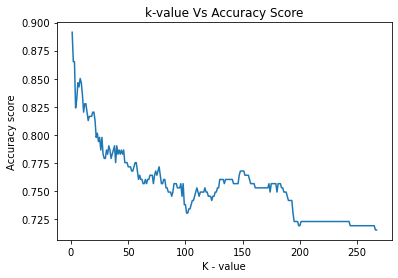

In [10]:
import matplotlib.pyplot as plt 
   
x = [*range(1,len(lst)+1)] 
y = lst 
 
plt.plot(x, y) 
  
plt.xlabel('K - value') 
plt.ylabel('Accuracy score') 
 
plt.title('k-value Vs Accuracy Score') 

plt.show() 